# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Содержание методического пособия:


<ol>
<li>Что такое TensorFlow</li>
<li>Основы синтаксиса TensorFlow</li>
<li>Пример нейросети на TensorFlow</li>
</ol>

## Что такое TensorFlow

TensorFlow - это фреймворк для создания ML моделей. TensorFlow предназначен в первую очередь для Deep Learning, т.е. создания современных нейросетей. Однако в TensorFlow также есть поддержка некоторых классических ML алгоритмов: K-means clustering, Random Forests, Support Vector Machines, Gaussian Mixture Model clustering, Linear/logistic regression.

TensorFlow выпустила компания Google в 2015. TensorFlow - это opensource проект. На данный момент это один из основных инструментов для создания нейросетей в рабочих целях. TensorFlow позволяет создавать нейронные сети как для кластеров из большого количества вычислительных устройств, так и для устройств с относительно небольшой вычислитей мощностью, таких как смартфоны и одноплатные компьютеры.

TensorFlow применяется самой компанией Google для ее поиска, почты, переводчика, распознования голоса, внутренних нужд наподобие мониторинга оборудования. TensorFlow используется различными компаниями для различных проектов, связанных с компьютерным зрением, решением задач ранжирования и т.д.


<img src="https://drive.google.com/uc?export=view&id=1YSzD1P42f8aEjE7V6bKcu3kc2oLsOFaY" width=600px />

## Основы синтаксиса TensorFlow

Процесс создания нейросети на TensorFlow схож с разобранным нами процессом обучения нейросети на Keras. Отличее здесь в том, что здесь нам нужно прописать больше деталей в коде. 

Особенностью TensorFlow версии 1 является то, что сначала необходимо декларировать переменные и вычисления, которые будут совершены над ними, а потом уже непосредственно запускать работу над данными.
Tf версии 1 менее дружественный к разработчикам.

Давайте рассмотрим базовые вещи в синтаксисе Tensorflow 2.

In [ ]:
#!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.9.2


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!nvidia-smi

Wed Oct 26 16:04:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------


Название TensorFlow означает поток тензоров. Тензоры - это массивы. Данные в компьютере представлены часто в виде массивах и работа с этими массивами подразумевает их преобразования. Преобразования осуществляются через, к примеру, математические операции. Работа TensorFlow складывается из цепочки преобразований тензоров, т.е. данных. Сами операции осуществляющие преобразование данных представлены в TensorFlow в виде графов.

<img src='https://drive.google.com/uc?export=view&id=1pDiSoBIL8IBpIFq3R4OKGRW3YseBRvFm'>


Визуализизация тензора с более чем двумя осями:

<img src='https://drive.google.com/uc?Export=view&id=1C6pu0iDx1Ugz2OMyE9d6KZH9IcN3-STG'>
<img src='https://drive.google.com/uc?export=view&id=1cmVLwGNLc8fkDpmNZreTecMNCXgD6zGl'>
<img src='https://drive.google.com/uc?export=view&id=1XiGSZVsVQrlH279eu2IK1bekSvccX6aT'>

Все тензоры неизменны, как числа и строки Python: вы никогда не можете обновить содержимое тензора, только создать новый.

Пример создания тензора «скаляра» или «ранга 0». Скаляр содержит одно значение и не содержит «осей».



In [ ]:
tf.constant(3)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

Тензор «вектора» или «ранга 1» подобен списку значений. Вектор имеет одну ось.



In [ ]:
tf.constant([2.0, 3.0, 4.0])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

Тензор «матрицы» или «ранга 2» имеет две оси.



In [ ]:
A = tf.constant([[3, 2], 
                 [5, 2]])

A

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 2],
       [5, 2]], dtype=int32)>

Вы можете преобразовать тензор в массив NumPy либо с помощью np.array либо с tensor.numpy метода tensor.numpy.

In [ ]:
display(np.array(A), A.numpy())

array([[3, 2],
       [5, 2]], dtype=int32)

array([[3, 2],
       [5, 2]], dtype=int32)

Пример сложения и поэлементного умножения тензоров.

In [ ]:
B = tf.constant([[9, 5], 
                 [1, 3]])


print(tf.add(A, B), "\n")
print(A + B, "\n")


print(tf.multiply(A, B), "\n")
print(A * B, "\n")


AB = tf.concat(values=[A, B], axis=0)
print(AB.numpy())

tf.Tensor(
[[12  7]
 [ 6  5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[12  7]
 [ 6  5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[27 10]
 [ 5  6]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[27 10]
 [ 5  6]], shape=(2, 2), dtype=int32) 

[[3 2]
 [5 2]
 [9 5]
 [1 3]]


Пример изменения размерности тензора. 

In [ ]:
tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor=tensor, shape=(1, 8)) 

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2 9 5 1 3]]


Пример матричного умножения.

In [ ]:
A = tf.constant([[3, 7], 
                 [1, 9],
                 [1, 2]])


B = tf.constant([[10, 10],
                 [1, 1]])

print(A.shape, B.shape, "\n")

print(tf.matmul(A, B), "\n")
print(A @ B, "\n")

(3, 2) (2, 2) 

tf.Tensor(
[[37 37]
 [19 19]
 [12 12]], shape=(3, 2), dtype=int32) 

tf.Tensor(
[[37 37]
 [19 19]
 [12 12]], shape=(3, 2), dtype=int32) 



In [ ]:
x = tf.random.uniform([3, 3])

print("есть ли доступные GPU:"),
print(tf.config.list_physical_devices("GPU"))

print("\nгде находится тензор")
print(x.device)

есть ли доступные GPU:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

где находится тензор
/job:localhost/replica:0/task:0/device:GPU:0


In [ ]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x, x)

  result = time.time() - start

  print("10 циклов: {:0.2f}ms".format(1000 * result))

# исполнение CPU
print("CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# исполнение на GPU #0 , если доступен
if tf.config.list_physical_devices("GPU"):
  print("GPU:")
  with tf.device("GPU:0"): # или GPU:1 , для 2х GPU, GPU:2 для 3х  и т.д.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

CPU:
10 циклов: 277.03ms
GPU:
10 циклов: 1.73ms


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
import matplotlib.pyplot as plt

### Оптимизаторы

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD

# Классификация изображений одежды

Давайте разберем использование tensorflow 2 на примере датасета с одеждой. В этом датасете будут находиться маленькие изображения на белом фоне, такие как кросовки, футболки и прочее.

В данном случае мы будем использовать High API от TensorFlow

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70.000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

In [ ]:
from keras.datasets import fashion_mnist

(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [ ]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

Давайте посмотрим структуры полученного массива данных:

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
len(y_train_labels)

60000

In [ ]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
len(y_test_labels)

10000

In [ ]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Подготовка данных

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

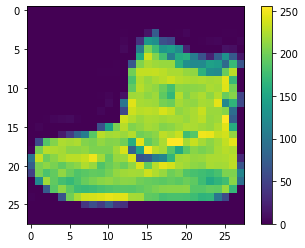

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Посмотрим первые 25 изображений:

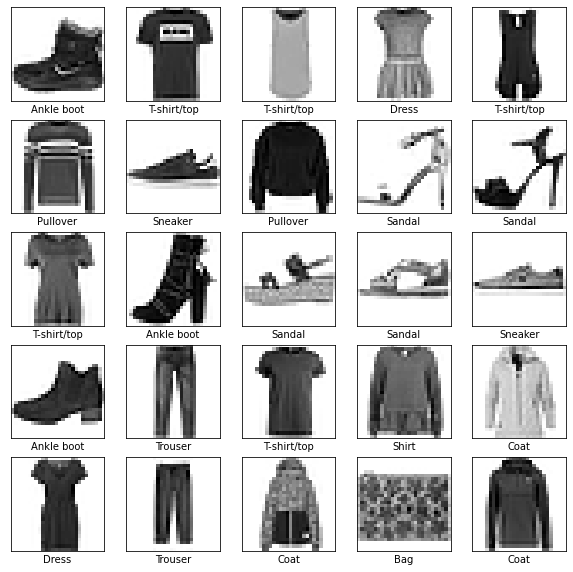

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

Соберем модель в функциональной форме (функциональное API Keras) 

Сеть собираем как последовательности соединей узлов:
 
 вход -> слой 1 -> слой 2 -> выход

 связь идет через тензоры

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784 (28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать.

In [ ]:
inputs = Input(shape=(28, 28))
x_1 = Flatten()(inputs)
x_2 = Dense(128, activation='relu')(x_1)
outputs = Dense(10)(x_2)

x_1, x_2, outputs

(<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'flatten_1')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_2')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_3')>)

In [ ]:
model = Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________



### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [ ]:
model.fit(X_train, y_train,
          epochs=5,
          batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6123 - accuracy: 0.7900 - val_loss: 0.4980 - val_accuracy: 0.8249
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4235 - accuracy: 0.8522 - val_loss: 0.4393 - val_accuracy: 0.8448
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3798 - accuracy: 0.8661 - val_loss: 0.4187 - val_accuracy: 0.8512
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3559 - accuracy: 0.8745 - val_loss: 0.3804 - val_accuracy: 0.8650
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3385 - accuracy: 0.8805 - val_loss: 0.3836 - val_accuracy: 0.8634


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3836 - accuracy: 0.8634 - 592ms/epoch - 2ms/step

Test accuracy: 0.8633999824523926


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых данных и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

На данный момент наша модель отвечает линейно:

In [ ]:
model.predict(X_test[:1])

1/1 [==============================] - 0s 67ms/step


array([[-4.622346  , -9.189793  , -5.618663  , -6.1334243 , -5.381773  ,
         2.035427  , -4.646897  ,  2.0140874 , -0.51285577,  5.052985  ]],
      dtype=float32)

In [ ]:
y_test[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# мультилейбл - sigmoid
# мультикласс - softmax

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети. 

**Softmax**

<img src='https://drive.google.com/uc?export=view&id=1dW-Hk-qogTWG-x3bkzlM5aHsWhxe3juX'>

In [ ]:
probability_model = Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [ ]:
predictions = probability_model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
predictions[0]

array([1.0356035e-05, 4.7538506e-07, 2.5988458e-05, 9.4815022e-07,
       1.0541875e-05, 5.5122990e-02, 1.2525517e-04, 7.7757768e-02,
       1.5619590e-03, 8.6538368e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
y_test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

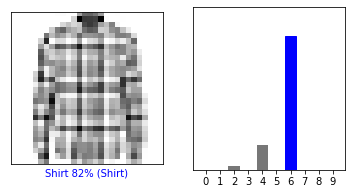

In [ ]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test_labels, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test_labels)
plt.show()

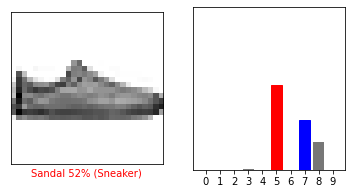

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test_labels, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний - 

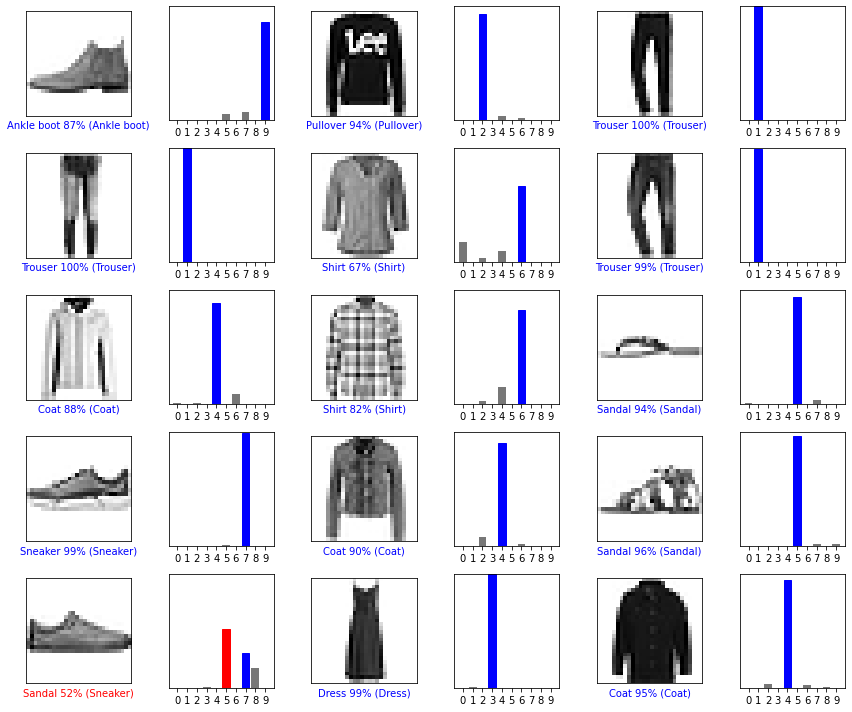

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test_labels, X_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test_labels)

plt.tight_layout()
plt.show()

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборки и посмотрим предсказание нейронной сети.

In [ ]:
i = 0
img = X_test[i]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member
imgs = np.expand_dims(img, 0)

print(imgs.shape)

print(img.reshape((1, img.shape[0], img.shape[0])).shape)
print(img[None].shape)

(1, 28, 28)
(1, 28, 28)
(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(imgs)

predictions_single

1/1 [==============================] - 0s 15ms/step


array([[1.0356035e-05, 4.7538506e-07, 2.5988458e-05, 9.4815022e-07,
        1.0541875e-05, 5.5123005e-02, 1.2525517e-04, 7.7757753e-02,
        1.5619599e-03, 8.6538368e-01]], dtype=float32)

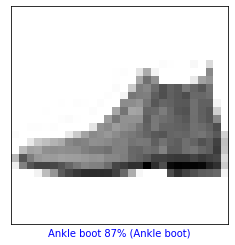

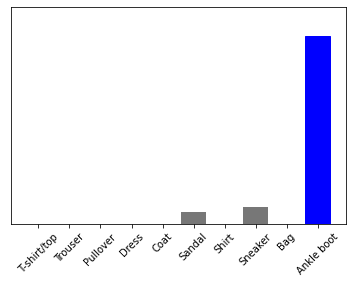

In [ ]:
plot_image(i, predictions, y_test_labels, X_test)
plt.show()
plot_value_array(i, predictions_single, y_test_labels)
plt.xticks(range(10), class_names, rotation=45);

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [ ]:
np.argmax(predictions_single[0])

9

## **Проведем анализ работы модели по слоям**

Состояние узлов в сети по эпохам (пакетам) и слоям можно оценить используя средства tensorflow через объект GradientTape() - исполняет шаг вычисления градиента для модели по ее loss для всех тренируемых весов модели (<имя модели>.trainable_weights) (см. https://www.tensorflow.org/guide/basic_training_loops, https://www.tensorflow.org/api_docs/python/tf/GradientTape)


данные для обучения получим из tensorflow.data.Dataset (https://www.tensorflow.org/guide/data), куда передаем выборку , а на выходе получаем генератор пакетов заданного размера

Начнем с простого примера, который рассматривали на первом вебинаре, когда изучали граф вычислений.

[Ссылка](https://docs.google.com/presentation/d/1Sfj8l91QFkFA6kMCe4CStCRDH5-pmfnZc8AEe8ujudg/edit) на презентацию.

In [ ]:
inputs = Input(shape=(1)) 
outputs = Dense(1, activation='sigmoid')(inputs)
model_toy = Model(inputs=inputs, outputs=outputs)

# Создадим экземпляр оптимизатора
optimizer = Adam(learning_rate=0.01)

# Создадим экспемпляр функции потерь
loss_fn = tf.keras.losses.MeanSquaredError()

model_toy.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_toy.get_weights()

[array([[-0.42299855]], dtype=float32), array([0.], dtype=float32)]

In [ ]:
# зададим начальные значения весов
params = [np.empty(shape = (1,1), dtype = np.float32), np.empty(shape = (1,), dtype = np.float32)]
params[0][0] = 0.417
params[1][0] = 0.72

model_toy.set_weights(params)
model_toy.get_weights()

[array([[0.417]], dtype=float32), array([0.72], dtype=float32)]

In [ ]:
# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X_toy = tf.constant([1.0])
y_toy = tf.constant([1.0])

X_toy = tf.constant([0.0, 1.0])
y_toy = tf.constant([0.0, 1.0])


for epoch in range(1000):     
    # Откроем GradientTape чтобы записать операции
    # выполняемые во время прямого прохода, включающего автодифференцирование
    with tf.GradientTape() as tape: 
        # Запустим прямой проход слоя
        pred = model_toy(X_toy)
        # print('Prediction is', pred.numpy())

        # Вычислим значение потерь
        loss_value = loss_fn(y_toy, pred)
        # print('Loss is', loss_value.numpy())

        # Используем gradient tape для автоматического извлечения градиентов 
        # обучаемых переменных относительно потерь
        grads = tape.gradient(loss_value, model_toy.trainable_weights) 
        # print('Grad are', grads)
        

    # Выполним один шаг градиентного спуска,
    # обновив значение переменных минимизирующих потери
    optimizer.apply_gradients(zip(grads, model_toy.trainable_weights)) 

In [ ]:
model_toy.trainable_weights

[<tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[5.360791]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([-2.5071557], dtype=float32)>]

In [ ]:
model_toy.predict([0.0, 1.0])

1/1 [==============================] - 0s 24ms/step


array([[0.07535806],
       [0.94550633]], dtype=float32)

Теперь возвращаемся к примеру с картинками.

In [ ]:
# собираем сеть
level = 6

inputs = Input(shape=(28, 28, 1), name='fashion') 
x = Flatten()(inputs)

for i in range(level):
    # x = Dense(64, activation='sigmoid', name=f'dense_{i}')(x)
    x = Dense(64, activation='relu', name=f'dense_{i}')(x)


outputs = Dense(10, activation='sigmoid', name='predictions')(x) 
modelg = Model(inputs=inputs, outputs=outputs) 
modelg.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fashion (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_0 (Dense)             (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160

In [ ]:
# Создадим экземпляр оптимизатора
optimizer = Adam(learning_rate=1e-3) 

# Создадим экспемпляр функции потерь
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# Подготовим тренировочный датасет
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) 
train_dataset = train_dataset.shuffle(buffer_size=X_train.shape[0]).batch(batch_size) 

In [ ]:
for batch in train_dataset:
    print('Shape of images', batch[0].shape)
    print('Shape of labels', batch[1].shape)
    break

Shape of images (64, 28, 28)
Shape of labels (64, 10)


In [ ]:
# Итерируем по эпохам
grad_log = []

epochs = 2  # учим немного, т.к. задача посмотреть , что происходит с градиентом

for epoch in range(epochs): 
    print(f'\nНачинаем эпоху {epoch}') 

    # Итерируем по батчам в датасете
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset): 
        
        # Откроем GradientTape чтобы записать операции
        # выполняемые во время прямого прохода, включающего автодифференцирование
        with tf.GradientTape() as tape: 
            # Запустим прямой проход слоя
            preds = modelg(x_batch_train) 

            # Вычислим значение потерь для этого батча
            loss_value = loss_fn(y_batch_train, preds)

            # Используем gradient tape для автоматического извлечения градиентов 
            # обучаемых переменных относительно потерь
            grads = tape.gradient(loss_value, modelg.trainable_weights) 
            g_g = []

            # пишем логи для сохранения значений градиента и веса по одной цепи 
            for g_s in grads:
                # допишем логи значений градиента в зависимости от размера тензора градиента
                # if len(g_s.numpy().shape) == 1:
                #     g_g.append(g_s.numpy()[0])
                if len(g_s.numpy().shape) == 2:
                    g_g.append(g_s.numpy()[0, 0]) 

                
        # добавляем текущие логи по слоям к общей записи
        grad_log.append(g_g)

        # Выполним один шаг градиентного спуска,
        # обновив значение переменных минимизирующих потери
        optimizer.apply_gradients(zip(grads, modelg.trainable_weights)) 

        # Пишем лог каждые 200 шагов
        if step % 200 == 0:
            print(f'Эпоха {epoch + 1}/{epochs}', end='. ')
            print(f'Шаг {step}. Лосс на обучении (для одного батча) на шаге: {loss_value}') 
            print(f'Уже увидели: {(step + 1) * batch_size} примеров')


Начинаем эпоху 0
Эпоха 1/2. Шаг 0. Лосс на обучении (для одного батча) на шаге: 2.302700996398926
Уже увидели: 64 примеров
Эпоха 1/2. Шаг 200. Лосс на обучении (для одного батча) на шаге: 0.3173890709877014
Уже увидели: 12864 примеров
Эпоха 1/2. Шаг 400. Лосс на обучении (для одного батча) на шаге: 0.46857988834381104
Уже увидели: 25664 примеров
Эпоха 1/2. Шаг 600. Лосс на обучении (для одного батча) на шаге: 0.6595134735107422
Уже увидели: 38464 примеров
Эпоха 1/2. Шаг 800. Лосс на обучении (для одного батча) на шаге: 0.32317376136779785
Уже увидели: 51264 примеров

Начинаем эпоху 1
Эпоха 2/2. Шаг 0. Лосс на обучении (для одного батча) на шаге: 0.32986608147621155
Уже увидели: 64 примеров
Эпоха 2/2. Шаг 200. Лосс на обучении (для одного батча) на шаге: 0.3694465756416321
Уже увидели: 12864 примеров
Эпоха 2/2. Шаг 400. Лосс на обучении (для одного батча) на шаге: 0.5656865835189819
Уже увидели: 25664 примеров
Эпоха 2/2. Шаг 600. Лосс на обучении (для одного батча) на шаге: 0.374356716

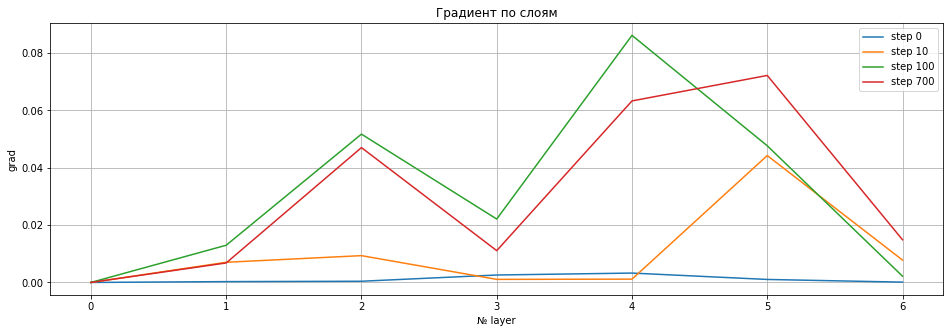

In [ ]:
grad_log = np.array(grad_log)

plt.figure(figsize=(16, 5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0, :]), label='step 0')
plt.plot(np.abs(grad_log[10, :]), label='step 10')
plt.plot(np.abs(grad_log[100, :]), label='step 100')
plt.plot(np.abs(grad_log[700, :]), label='step 700')
plt.legend()
plt.show()

Видим, что чем дальше слой от функции потерь, чем он ближе к началу, тем градиент становится меньше.

Итого, если хочется более детально и низкоуровнево следить за обучением модели, нужно сделать следующие шаги:
1. Взять батч объектов
2. Получить предсказания модель на объктах
3. Посчитать ошибку предсказания
4. Посчитать градиенты
5. Сделать шаг оптимизации

### Сделаем анализ ошибок модели

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_pred = np.argmax(modelg.predict(X_test), axis=1)
y_pred[:10]

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
CM = confusion_matrix(y_test_labels, y_pred)
print(CM)

[[784   7  16  29   4   1 143   0  16   0]
 [  0 966   2  19   4   0   8   0   1   0]
 [  7   1 601   7 203   0 176   0   5   0]
 [ 23  45  13 818  53   2  42   0   4   0]
 [  0   1  50  17 849   0  79   0   4   0]
 [  1   0   0   0   0 909   0  51   1  38]
 [114   5  55  23 105   0 675   0  23   0]
 [  0   0   0   0   0  11   0 933   0  56]
 [  0   1   3   4   6   6   8   7 965   0]
 [  0   0   0   0   0   2   0  28   1 969]]


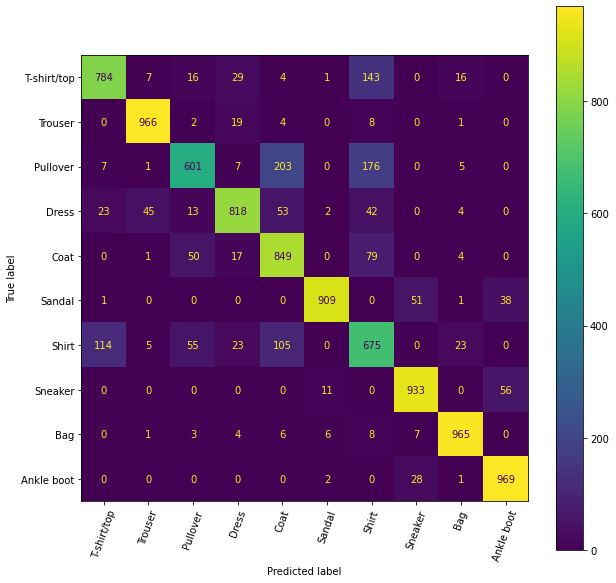

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(values_format='.3g', ax=ax)
plt.xticks(rotation=70)
plt.show();

Сеть делает ошибки. Можно их попробовать исправить, если сделать комбинацию сетей (ансамбль) . Проверим вариант усреднения.

# **Ансамбль сетей**

Использование функционального API для построения сложных сетей

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание


Реализуем одинаковые сети в разном стиле:
- model1 - линейная модель через список
- model2 - линейная модель через добавление слоев по очереди
- model3 - модель через функциональное описание


In [ ]:
# заполняем модель списком
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# заполняем модель, добавляя слои последовательно 
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))


# Заполняем модель, формируя граф передачи тензоров
input = Input(shape=(28, 28))
x = Flatten()(input)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model3 = Model(input, output)

### Функции потерь

1. Абсолютная
$$L(y, \hat{y}) = |y - \hat{y}|$$
2. Квадратичная
$$L(y, \hat{y}) = (y - \hat{y})^2$$
3. Бинарная кросс-энтропия (BinaryCrossentropy)
$$L(y, \hat{y}) = -\frac{1}{N}(y\log(\hat{y}) + (1 - y)\log(1-\hat{y}))$$

4. Категориальная кросс-энтропия (CategoricalCrossentropy, Softmax Loss)<br>
Функция ожидает метки классов в формате One-hot-encoding.
$$CE = - \log \frac{e_i}{\sum_j^C{e_j}}$$

5. Спарс категориальная кросс-энтропия (SparseCategoricalCrossentropy)<br>
Функция ожидает метки классов в формате Label-encoding.

In [ ]:
model1.compile(optimizer='sgd',
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])
model2.compile(optimizer='rmsprop',
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])
model3.compile(optimizer='adam',
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])


hist1 = model1.fit(X_train, y_train_labels,
                   epochs=5,
                   batch_size=256,
                   validation_data=(X_test, y_test_labels))
print()
hist2 = model2.fit(X_train, y_train_labels,
                   epochs=5,
                   batch_size=256,
                   validation_data=(X_test, y_test_labels))
print()
hist3 = model3.fit(X_train, y_train_labels,
                   epochs=5,
                   batch_size=256,
                   validation_data=(X_test, y_test_labels))

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 1.2982 - accuracy: 0.6177 - val_loss: 0.9375 - val_accuracy: 0.6943
Epoch 2/5
235/235 [==============================] - 1s 3ms/step - loss: 0.8256 - accuracy: 0.7317 - val_loss: 0.7721 - val_accuracy: 0.7401
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.7146 - accuracy: 0.7663 - val_loss: 0.7007 - val_accuracy: 0.7646
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6550 - accuracy: 0.7854 - val_loss: 0.6527 - val_accuracy: 0.7821
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6156 - accuracy: 0.7982 - val_loss: 0.6237 - val_accuracy: 0.7891

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6317 - accuracy: 0.7795 - val_loss: 0.5169 - val_accuracy: 0.8147
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4317 - accuracy: 0.8437 - val_loss: 0.4552 - val_accuracy: 0.8370
Epoch 3/5
23

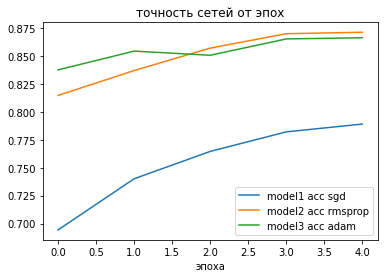

In [ ]:
plt.plot(hist1.history['val_accuracy'], label='model1 acc sgd')
plt.plot(hist2.history['val_accuracy'], label='model2 acc rmsprop')
plt.plot(hist3.history['val_accuracy'], label='model3 acc adam')
plt.title('точность сетей от эпох')
plt.xlabel('эпоха')
plt.legend()
plt.show()

In [ ]:
y_pred1 = np.argmax(model1.predict(X_test), axis=1)
y_pred2 = np.argmax(model2.predict(X_test), axis=1)
y_pred3 = np.argmax(model3.predict(X_test), axis=1)

CM1 = confusion_matrix(y_test_labels, y_pred1)
CM2 = confusion_matrix(y_test_labels, y_pred2)
CM3 = confusion_matrix(y_test_labels, y_pred3)

313/313 [==============================] - 1s 2ms/step


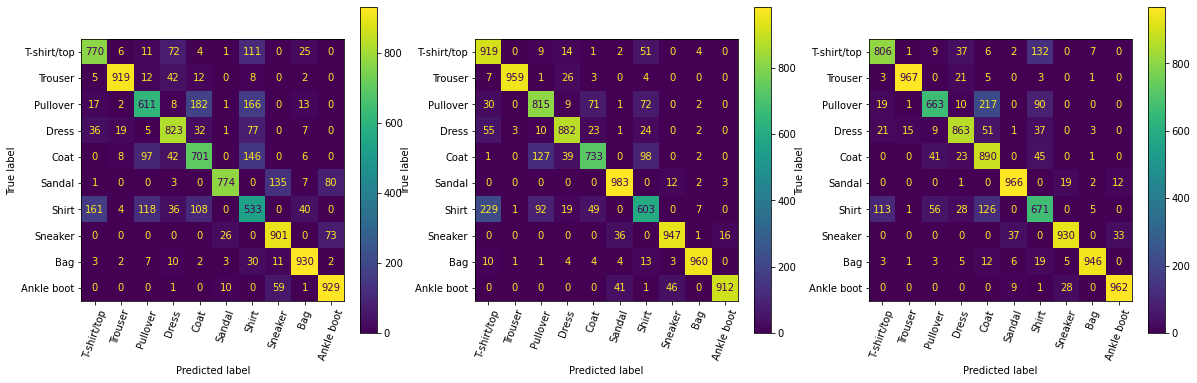

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=CM1, display_labels=class_names)
disp1.plot(ax=ax1, values_format='.3g')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)

disp2 = ConfusionMatrixDisplay(confusion_matrix=CM2, display_labels=class_names)
disp2.plot(ax=ax2, values_format='.3g')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)

disp3 = ConfusionMatrixDisplay(confusion_matrix=CM3, display_labels=class_names)
disp3.plot(ax=ax3, values_format='.3g')
plt.xticks(rotation=70)

plt.show()

In [ ]:
# сохранить модели на диск.
model1.save('model1.h5')
model2.save('model2.h5')
model3.save('model3.h5')

# прочитать модели с диска
# model = load_model('model.h5')

Сделаем предсказание на тестовом изображении

In [ ]:
y_pred_proba = model3.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

313/313 [==============================] - 0s 1ms/step


Отобразим значения на выходах сети (10 выходов - 10 точек графика)

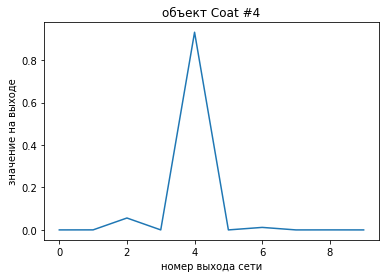

In [ ]:
N = 10 
plt.plot(y_pred_proba[N, :])
plt.title(f'объект {class_names[y_test_labels[N]]} #{str(y_test_labels[N])}')
plt.xlabel('номер выхода сети')
plt.ylabel('значение на выходе')
plt.show()

In [ ]:
test_loss, test_acc = model1.evaluate(X_test, y_test_labels, verbose=2)
test_loss, test_acc = model2.evaluate(X_test, y_test_labels, verbose=2)
test_loss, test_acc = model3.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 0.6178 - accuracy: 0.7901 - 572ms/epoch - 2ms/step
313/313 - 1s - loss: 0.3940 - accuracy: 0.8604 - 595ms/epoch - 2ms/step
313/313 - 1s - loss: 0.3646 - accuracy: 0.8690 - 584ms/epoch - 2ms/step


Усреднение моделей

In [ ]:
input = Input(shape=(28, 28))
flat = Flatten()(input)

x1 = Dense(128, activation='relu')(flat)
x1 = Dense(10, activation='softmax')(x1)
model1 = Model(inputs=input, outputs=x1)


x2 = Dense(256, activation='relu')(flat)
x2 = Dense(10, activation='softmax')(x2)
model2 = Model(inputs=input, outputs=x2)


x3 = Dense(256, activation='relu')(flat)
x3 = Dense(10, activation='softmax')(x3)
model3 = Model(inputs=input, outputs=x3)


# усредняем выходы сетей
out_all = tf.keras.layers.Average()([model1.output, model2.output, model3.output])
out_all = tf.keras.layers.Softmax()(out_all)

model_all = Model(inputs=[input], outputs=out_all)
model_all.compile(optimizer='adam',
                  loss=SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])


model1.load_weights('model1.h5')
model2.load_weights('model2.h5')
model3.load_weights('model3.h5')

In [ ]:
model_all.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_6 (Flatten)            (None, 784)          0           ['input_4[0][0]']                
                                                                                                  
 dense_23 (Dense)               (None, 128)          100480      ['flatten_6[0][0]']              
                                                                                                  
 dense_25 (Dense)               (None, 256)          200960      ['flatten_6[0][0]']              
                                                                                            

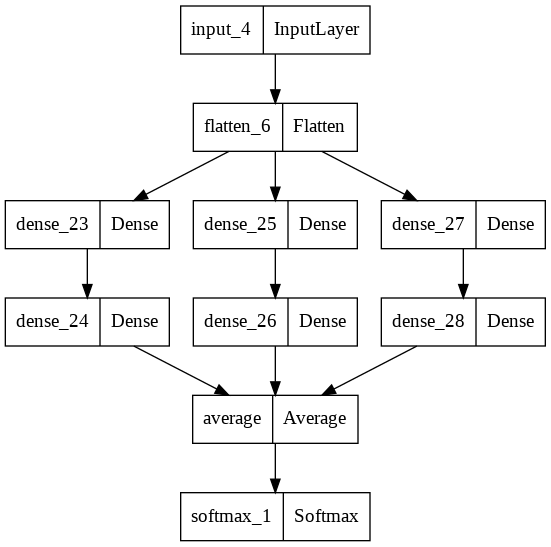

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_all)

In [ ]:
predictions_single = model_all.predict(imgs)
predictions_single

1/1 [==============================] - 0s 75ms/step


array([[0.088259  , 0.08825591, 0.08826169, 0.08826587, 0.08827776,
        0.09700608, 0.08827157, 0.10826904, 0.08913592, 0.1759972 ]],
      dtype=float32)

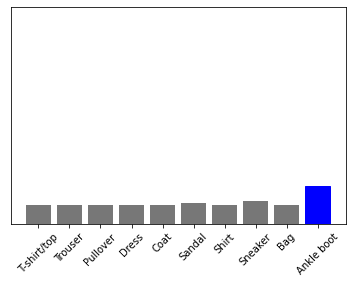

In [ ]:
plot_value_array(0, predictions_single, y_test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 2.2115 - accuracy: 0.8711 - 853ms/epoch - 3ms/step


313/313 [==============================] - 1s 2ms/step


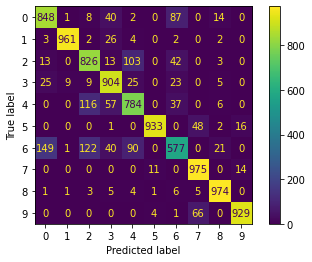

In [ ]:
y_pred_all = np.argmax(model_all.predict(X_test), axis=1)

CM_all = confusion_matrix(y_test_labels, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(values_format ='.3g')
plt.show()

In [ ]:
hist1 = model_all.fit(X_train, y_train_labels,
                      epochs=5,
                      batch_size=256,
                      validation_data=(X_test, y_test_labels))

Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 2.1981 - accuracy: 0.8705 - val_loss: 2.1977 - val_accuracy: 0.8569
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 2.1939 - accuracy: 0.8789 - val_loss: 2.1955 - val_accuracy: 0.8637
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 2.1922 - accuracy: 0.8853 - val_loss: 2.1941 - val_accuracy: 0.8698
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 2.1913 - accuracy: 0.8881 - val_loss: 2.1938 - val_accuracy: 0.8722
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 2.1906 - accuracy: 0.8917 - val_loss: 2.1931 - val_accuracy: 0.8731


313/313 [==============================] - 1s 2ms/step


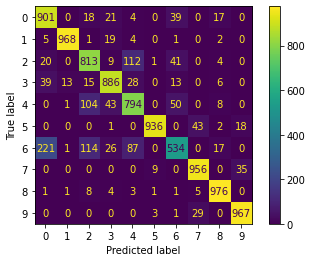

In [ ]:
y_pred_all = np.argmax(model_all.predict(X_test), axis=1)

CM_all = confusion_matrix(y_test_labels, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(values_format ='.3g')
plt.show()

In [ ]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 2.1931 - accuracy: 0.8731 - 627ms/epoch - 2ms/step


## Дообучение

Обучение только новых слоев. Старые слои моделей замораживаем и не обучаем.

In [ ]:
input = Input(shape=(28, 28))
flat = Flatten()(input)

x1 = Dense(128, activation='relu')(flat)
x1 = Dense(10, activation='softmax')(x1)
model1 = Model(inputs=input, outputs=x1)
# не обучаем слои модели
for layer in model1.layers:
    layer.trainable = False


x2 = Dense(256, activation='relu')(flat)
x2 = Dense(10, activation='softmax')(x2)
model2 = Model(inputs=input, outputs=x2)
# не обучаем слои модели
for layer in model2.layers:
    layer.trainable = False


x3 = Dense(256, activation='relu')(flat)
x3 = Dense(10, activation='softmax')(x3)
model3 = Model(inputs=input, outputs=x3)
# не обучаем слои модели
for layer in model3.layers:
    layer.trainable = False


# усредняем выходы сетей
out_all = tf.keras.layers.Average()([model1.output, model2.output, model3.output])
# добавляем новый обучаемый слой
# out_all = Dense(10, activation='relu')(out_all)

out_all = tf.keras.layers.Softmax()(out_all)

model_all = Model(inputs=[input], outputs=out_all)
model_all.compile(optimizer='adam',
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])


model1.load_weights('model1.h5')
model2.load_weights('model2.h5')
model3.load_weights('model3.h5')

model_all.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_9 (Flatten)            (None, 784)          0           ['input_5[0][0]']                
                                                                                                  
 dense_17 (Dense)               (None, 128)          100480      ['flatten_9[0][0]']              
                                                                                                  
 dense_19 (Dense)               (None, 256)          200960      ['flatten_9[0][0]']              
                                                                                           

In [ ]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 2.2115 - accuracy: 0.8711 - 837ms/epoch - 3ms/step


In [ ]:
for layer in model_all.layers[:]:
    layer.trainable = True

model_all.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_9 (Flatten)            (None, 784)          0           ['input_5[0][0]']                
                                                                                                  
 dense_17 (Dense)               (None, 128)          100480      ['flatten_9[0][0]']              
                                                                                                  
 dense_19 (Dense)               (None, 256)          200960      ['flatten_9[0][0]']              
                                                                                           

In [ ]:
model_all.compile(optimizer='adam',
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

In [ ]:
hist1 = model_all.fit(X_train, y_train_labels,
                      epochs=10,
                      batch_size=256,
                      validation_data=(X_test, y_test_labels))

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 1.6159 - accuracy: 0.8766 - val_loss: 1.6150 - val_accuracy: 0.8663
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 1.5947 - accuracy: 0.8854 - val_loss: 1.6103 - val_accuracy: 0.8665
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 1.5872 - accuracy: 0.8891 - val_loss: 1.6030 - val_accuracy: 0.8739
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 1.5809 - accuracy: 0.8952 - val_loss: 1.5988 - val_accuracy: 0.8752
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 1.5762 - accuracy: 0.8984 - val_loss: 1.5974 - val_accuracy: 0.8732
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 1.5735 - accuracy: 0.9005 - val_loss: 1.5935 - val_accuracy: 0.8763
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 1.5700 - accuracy: 0.9030 - val_loss: 1.5896 - val_accuracy: 0.8807
Epoch 

In [ ]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 2.2115 - accuracy: 0.8711 - 610ms/epoch - 2ms/step


In [ ]:
model_all.save('model_all.h5')

In [ ]:
model_loaded = tf.keras.models.load_model('model_all.h5')
test_loss, test_acc = model_loaded.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 2.2115 - accuracy: 0.8711 - 730ms/epoch - 2ms/step


Tensorflow - это про обработку нейросетей более сложным способом, с большей степенью интерактивности и воздействия на модель.

Tensorflow позволяет обучать модели высокоуровнево, благодаря Keras, либо низкоуровнево через циклы, в которых нужно прописывать:
1. Проход по батчу
2. Предсказание модели на батче
3. Подсчет ошибки
4. Подсчет градиентов
5. Обратный проход
6. Логирование информации

# Домашнее задание

  1. Постройте нейронную сеть (берем несложную полносвязную сеть, меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасете from sklearn.datasets import load_boston. 
  2. Постройте 10-15 вариантов разных нейронных сетей и сведите результаты их работы в таблицу.  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

    

# Дополнительные материалы

1. https://www.tensorflow.org/api_docs - Документация
2. https://www.tensorflow.org/tutorials/ - Туториалы

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.tensorflow.org/</li>
    <li>https://www.tensorflow.org/tutorials/keras/classification</li>
    <li>Singh P., Manure A. - Learn TensorFlow 2.0 - 2020</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>